In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dt = pd.read_csv(r"C:\Users\asus\Downloads/Titanic-Dataset.csv")

In [78]:
dt.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,19-35
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,36-50
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,19-35
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,36-50
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,36-50
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,51-65
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0-18
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,19-35
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0-18


In [7]:
dt.shape

(891, 12)

In [8]:
dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
dt.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Missing value

In [12]:
dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# dropping null values 
dt = dt.drop(['Cabin'], axis=1)

In [17]:
dt.shape

(891, 11)

In [24]:
## missing value of age with median value
dt['Age'].fillna(dt['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [26]:
dt['Embarked'].fillna(dt['Embarked'].mode())

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

## Survival Count

In [51]:
survived_counts = dt['Survived'].value_counts()
survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Proportion')

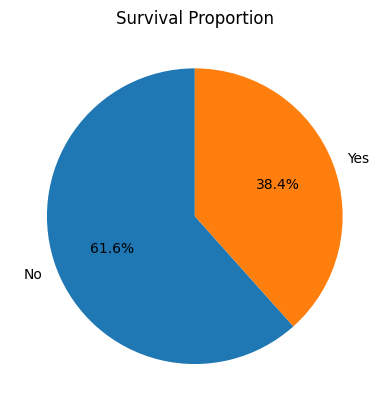

In [71]:
plt.pie(survived_counts, labels=['No','Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Proportion')

## No. of Survivors by Gender

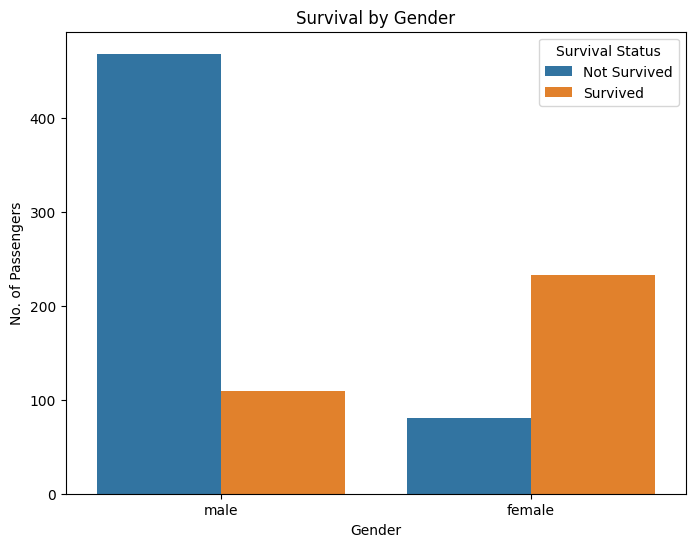

In [70]:
plt.figure(figsize = (8,6))
survival_by_gender = dt.groupby('Sex')['Survived'].sum()
total_passengers_by_gender = dt['Sex'].value_counts()
sns.countplot( x = 'Sex', hue = 'Survived', data = dt)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('No. of Passengers')
plt.legend(title= 'Survival Status', loc= 'upper right', labels=['Not Survived', 'Survived'])

Text(0, 0.5, 'No. of Passangers')

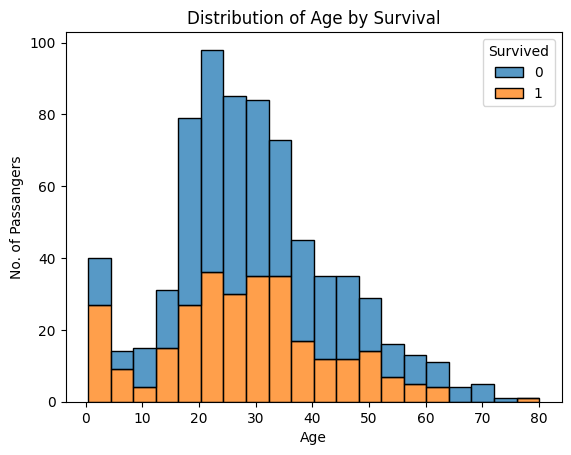

In [49]:
# distribution of age of survivors and non survivors
sns.histplot(data =dt, x='Age' , hue='Survived', multiple='stack' , bins=20)
plt.title('Distribution of Age by Survival')
plt.xlabel('Age')
plt.ylabel('No. of Passangers')

In [72]:
dt.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [73]:
dt.groupby(['Pclass','Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: count, dtype: int64

In [77]:
bins = [0, 18, 35, 50, 65, float('inf')]
labels =['0-18', '19-35', '36-50', '51-65', '66+']
dt['AgeGroup'] = pd.cut(dt['Age'], bins=bins, labels=labels, right=False)
dt[dt['Survived']==0].groupby(['AgeGroup'])['Survived'].value_counts()

C:\Users\asus\AppData\Local\Temp\ipykernel_40896\2798870674.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt[dt['Survived']==0].groupby(['AgeGroup'])['Survived'].value_counts()


AgeGroup  Survived
0-18      0            52
19-35     0           231
36-50     0            94
51-65     0            37
66+       0            10
Name: count, dtype: int64

In [88]:
# sibSp
dt.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

## Conclusion